# Classification

In [3]:
## Import libraries
import pandas as pd
## seaborn is used for visualisation e.g. pairplot
import seaborn as sns

import researchpy as rp

import graphviz


### Import data

In [4]:
## Import data
dataset = pd.read_csv('bank-data.csv')

In [5]:
dataset.head(15)

,Unnamed: 0,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
0,1,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,3,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,4,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,5,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,6,42,management,single,tertiary,no,NaN,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,7,56,management,married,tertiary,no,830.0,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,8,60,retired,divorced,secondary,no,545.0,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,9,37,technician,married,secondary,no,NaN,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,10,28,services,single,secondary,no,5090.0,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [6]:
# checking for missing values using the row count - can see balance has missing values
dataset.describe()

,Unnamed: 0,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted
count,11162.000000,11162.000000,9475.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5581.500000,41.231948,1824.106385,15.658036,371.993818,2.508421,51.330407,0.832557
std,3222.336187,11.913369,3414.744888,8.420740,347.128386,2.722077,108.758282,2.292007
min,1.000000,18.000000,10.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2791.250000,32.000000,282.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,5581.500000,39.000000,771.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,8371.750000,49.000000,2071.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,11162.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
Unnamed: 0                        11162 non-null int64
age                               11162 non-null int64
job                               11162 non-null object
maritalStatus                     11162 non-null object
education                         11162 non-null object
defaultedCredit                   11162 non-null object
balance                           9475 non-null float64
housingLoan                       11162 non-null object
personalLoan                      11162 non-null object
contactType                       11162 non-null object
day_of_month                      11162 non-null int64
month                             11162 non-null object
callDuration                      11162 non-null int64
numberTimesContactedInCampaign    11162 non-null int64
daysSinceLastContact              11162 non-null int64
totalTimesContacted               11162 non-null int64
ou

In [8]:
# finding ut how many subscribed
dataset['subscribed'].describe()

count     11162
unique        2
top          no
freq       5873
Name: subscribed, dtype: object

In [9]:
dataset['subscribed'].value_counts()

no     5873
yes    5289
Name: subscribed, dtype: int64

## Clean data

In [10]:
# Cleaning missing values
dataset = dataset.drop(columns = 'Unnamed: 0')

In [11]:
    # Drop any rows with NaN values
    # making new data frame with dropped NA values 
    dataset = dataset.dropna(axis = 0, how ='any') 

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 11159
Data columns (total 17 columns):
age                               9475 non-null int64
job                               9475 non-null object
maritalStatus                     9475 non-null object
education                         9475 non-null object
defaultedCredit                   9475 non-null object
balance                           9475 non-null float64
housingLoan                       9475 non-null object
personalLoan                      9475 non-null object
contactType                       9475 non-null object
day_of_month                      9475 non-null int64
month                             9475 non-null object
callDuration                      9475 non-null int64
numberTimesContactedInCampaign    9475 non-null int64
daysSinceLastContact              9475 non-null int64
totalTimesContacted               9475 non-null int64
outcomeLastCampaign               9475 non-null object
subscribed       

## Data Exploration

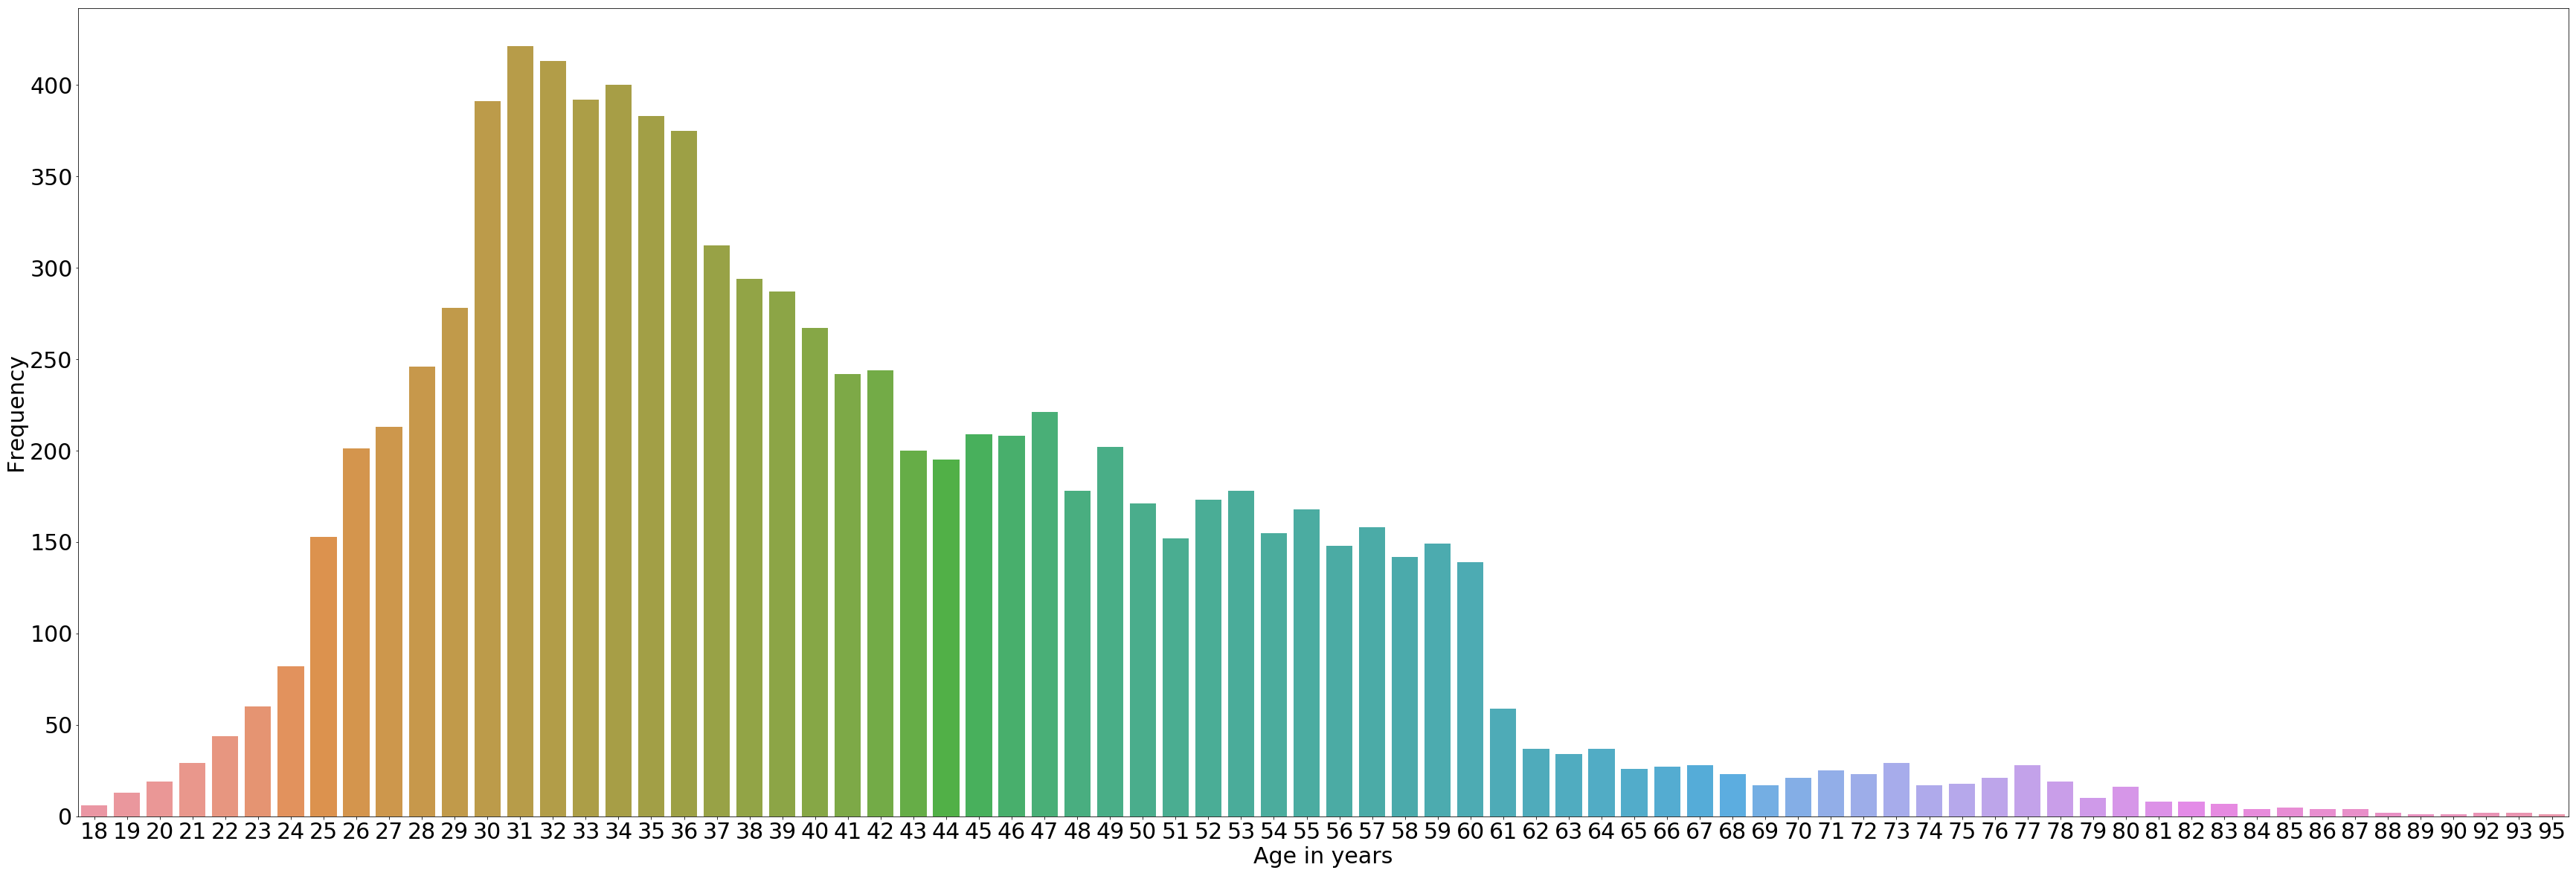

In [13]:
## bar chart of counts of customer ages using seaborn countplot
ax = sns.countplot(x='age', data=dataset)
ax.figure.set_size_inches(60,20)
ax.set_xlabel("Age in years", fontsize=30)
ax.set_ylabel("Frequency", fontsize=30)
ax.tick_params(labelsize=30)


### Box Plots

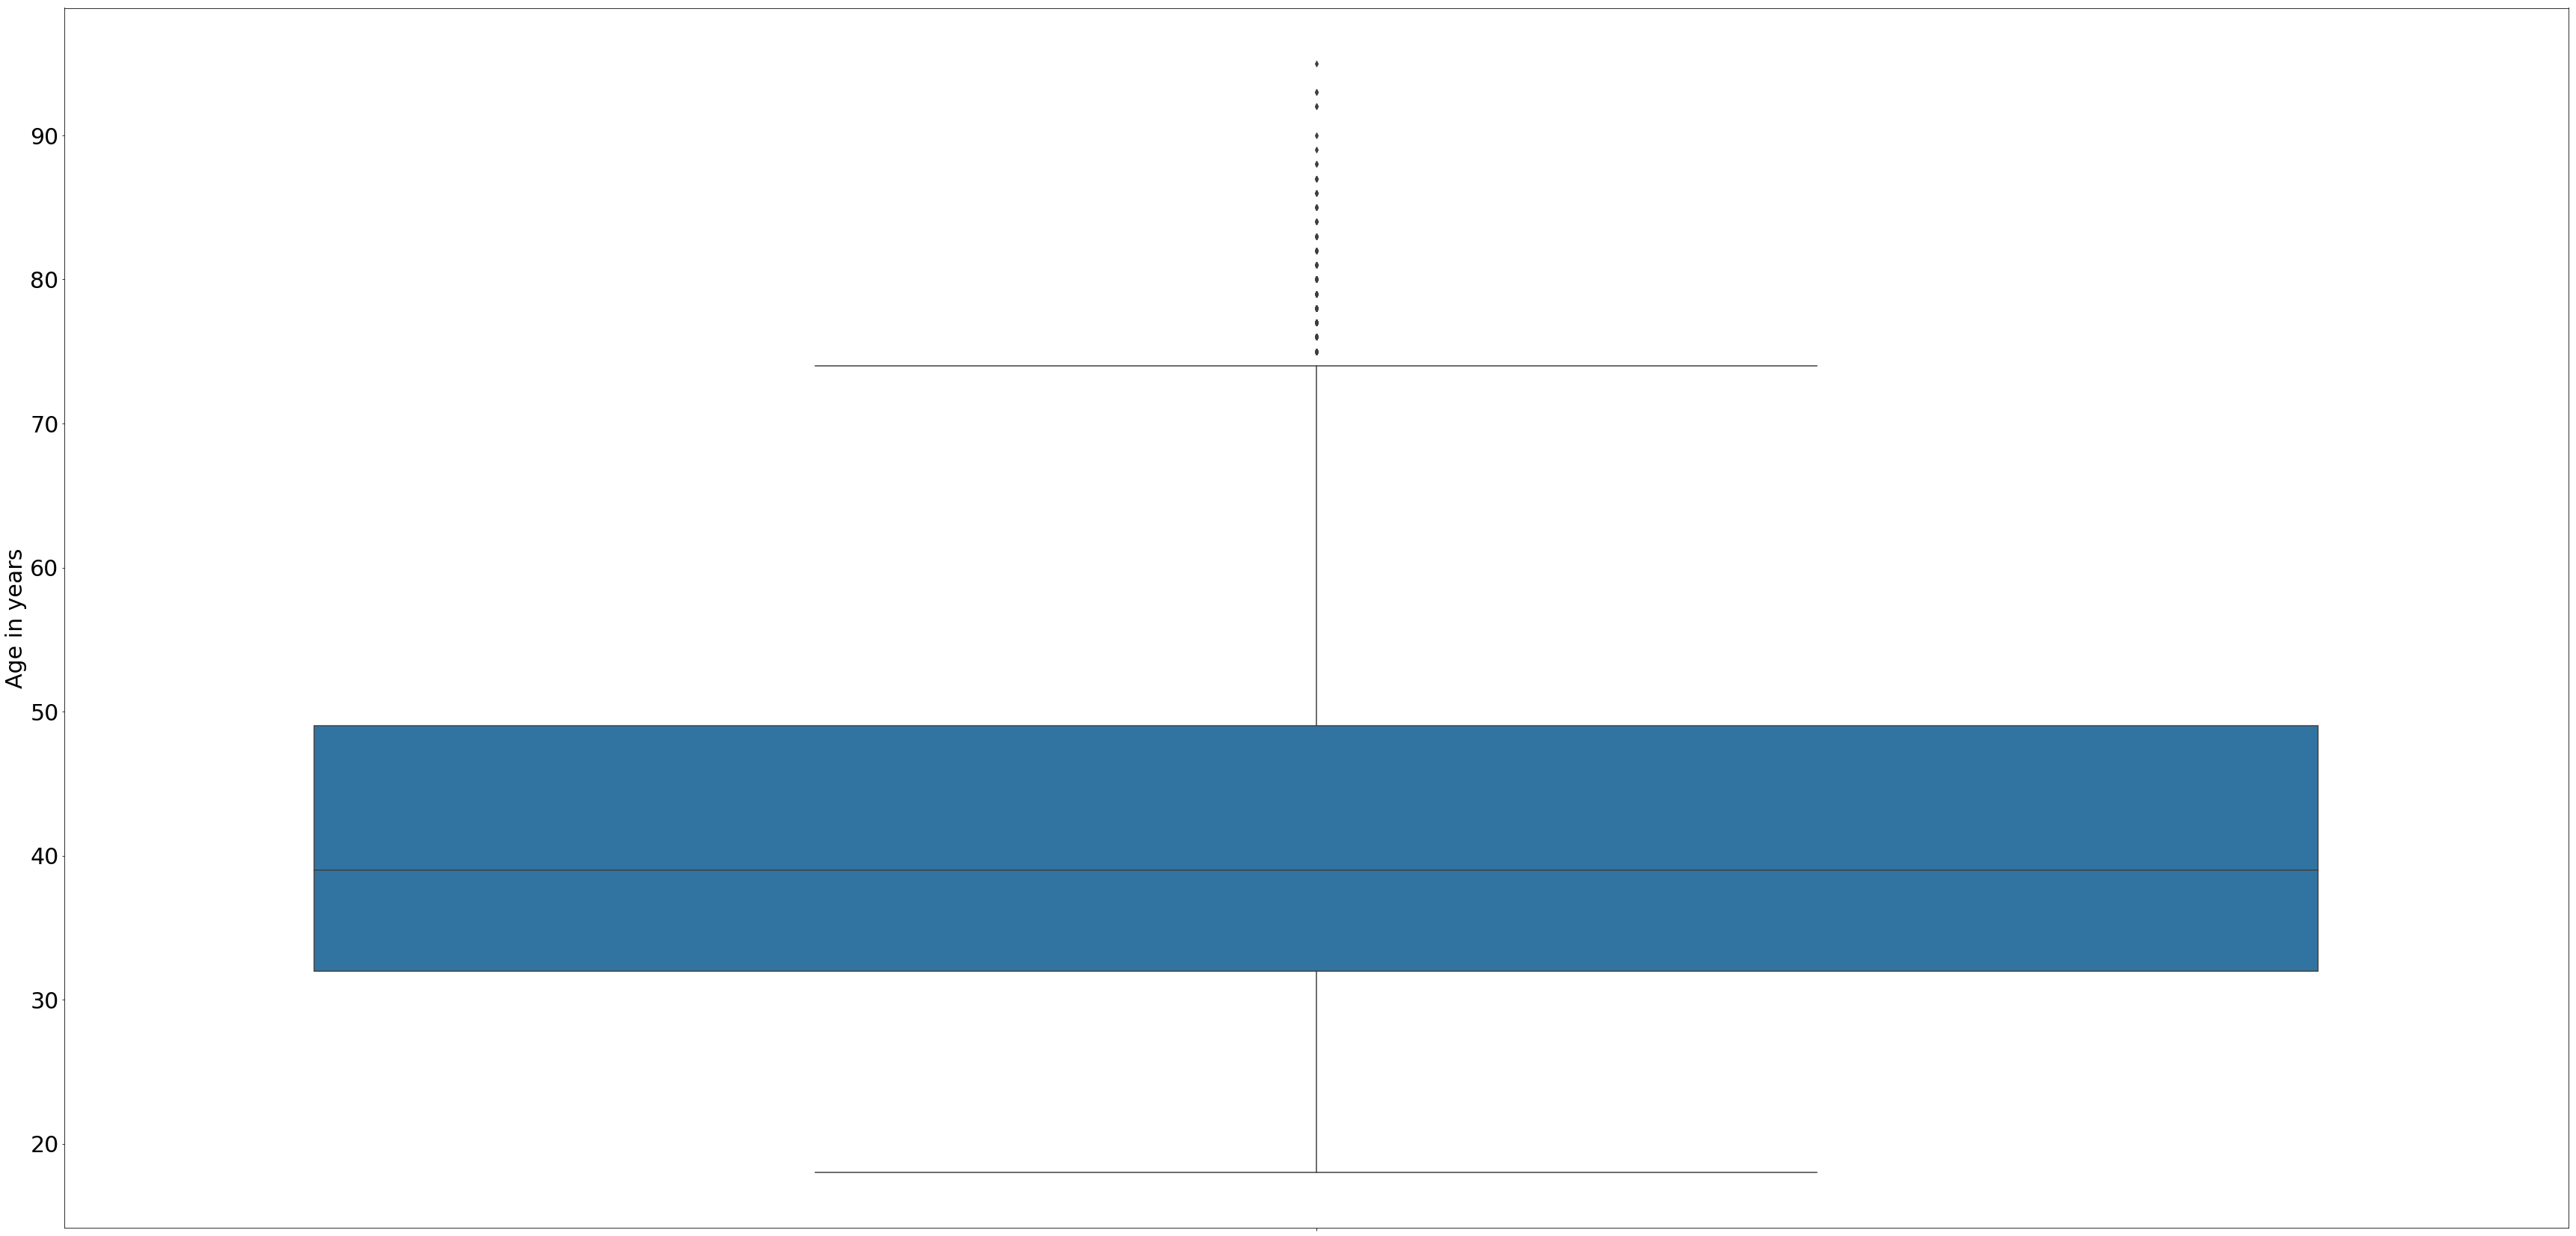

In [14]:
## boxplot to see variation of ages
ax2 = sns.boxplot(y=dataset["age"])
ax2.figure.set_size_inches(60,30)
ax2.set_ylabel("Age in years", fontsize=30)
ax2.tick_params(labelsize=30)

## Analyse Data Features

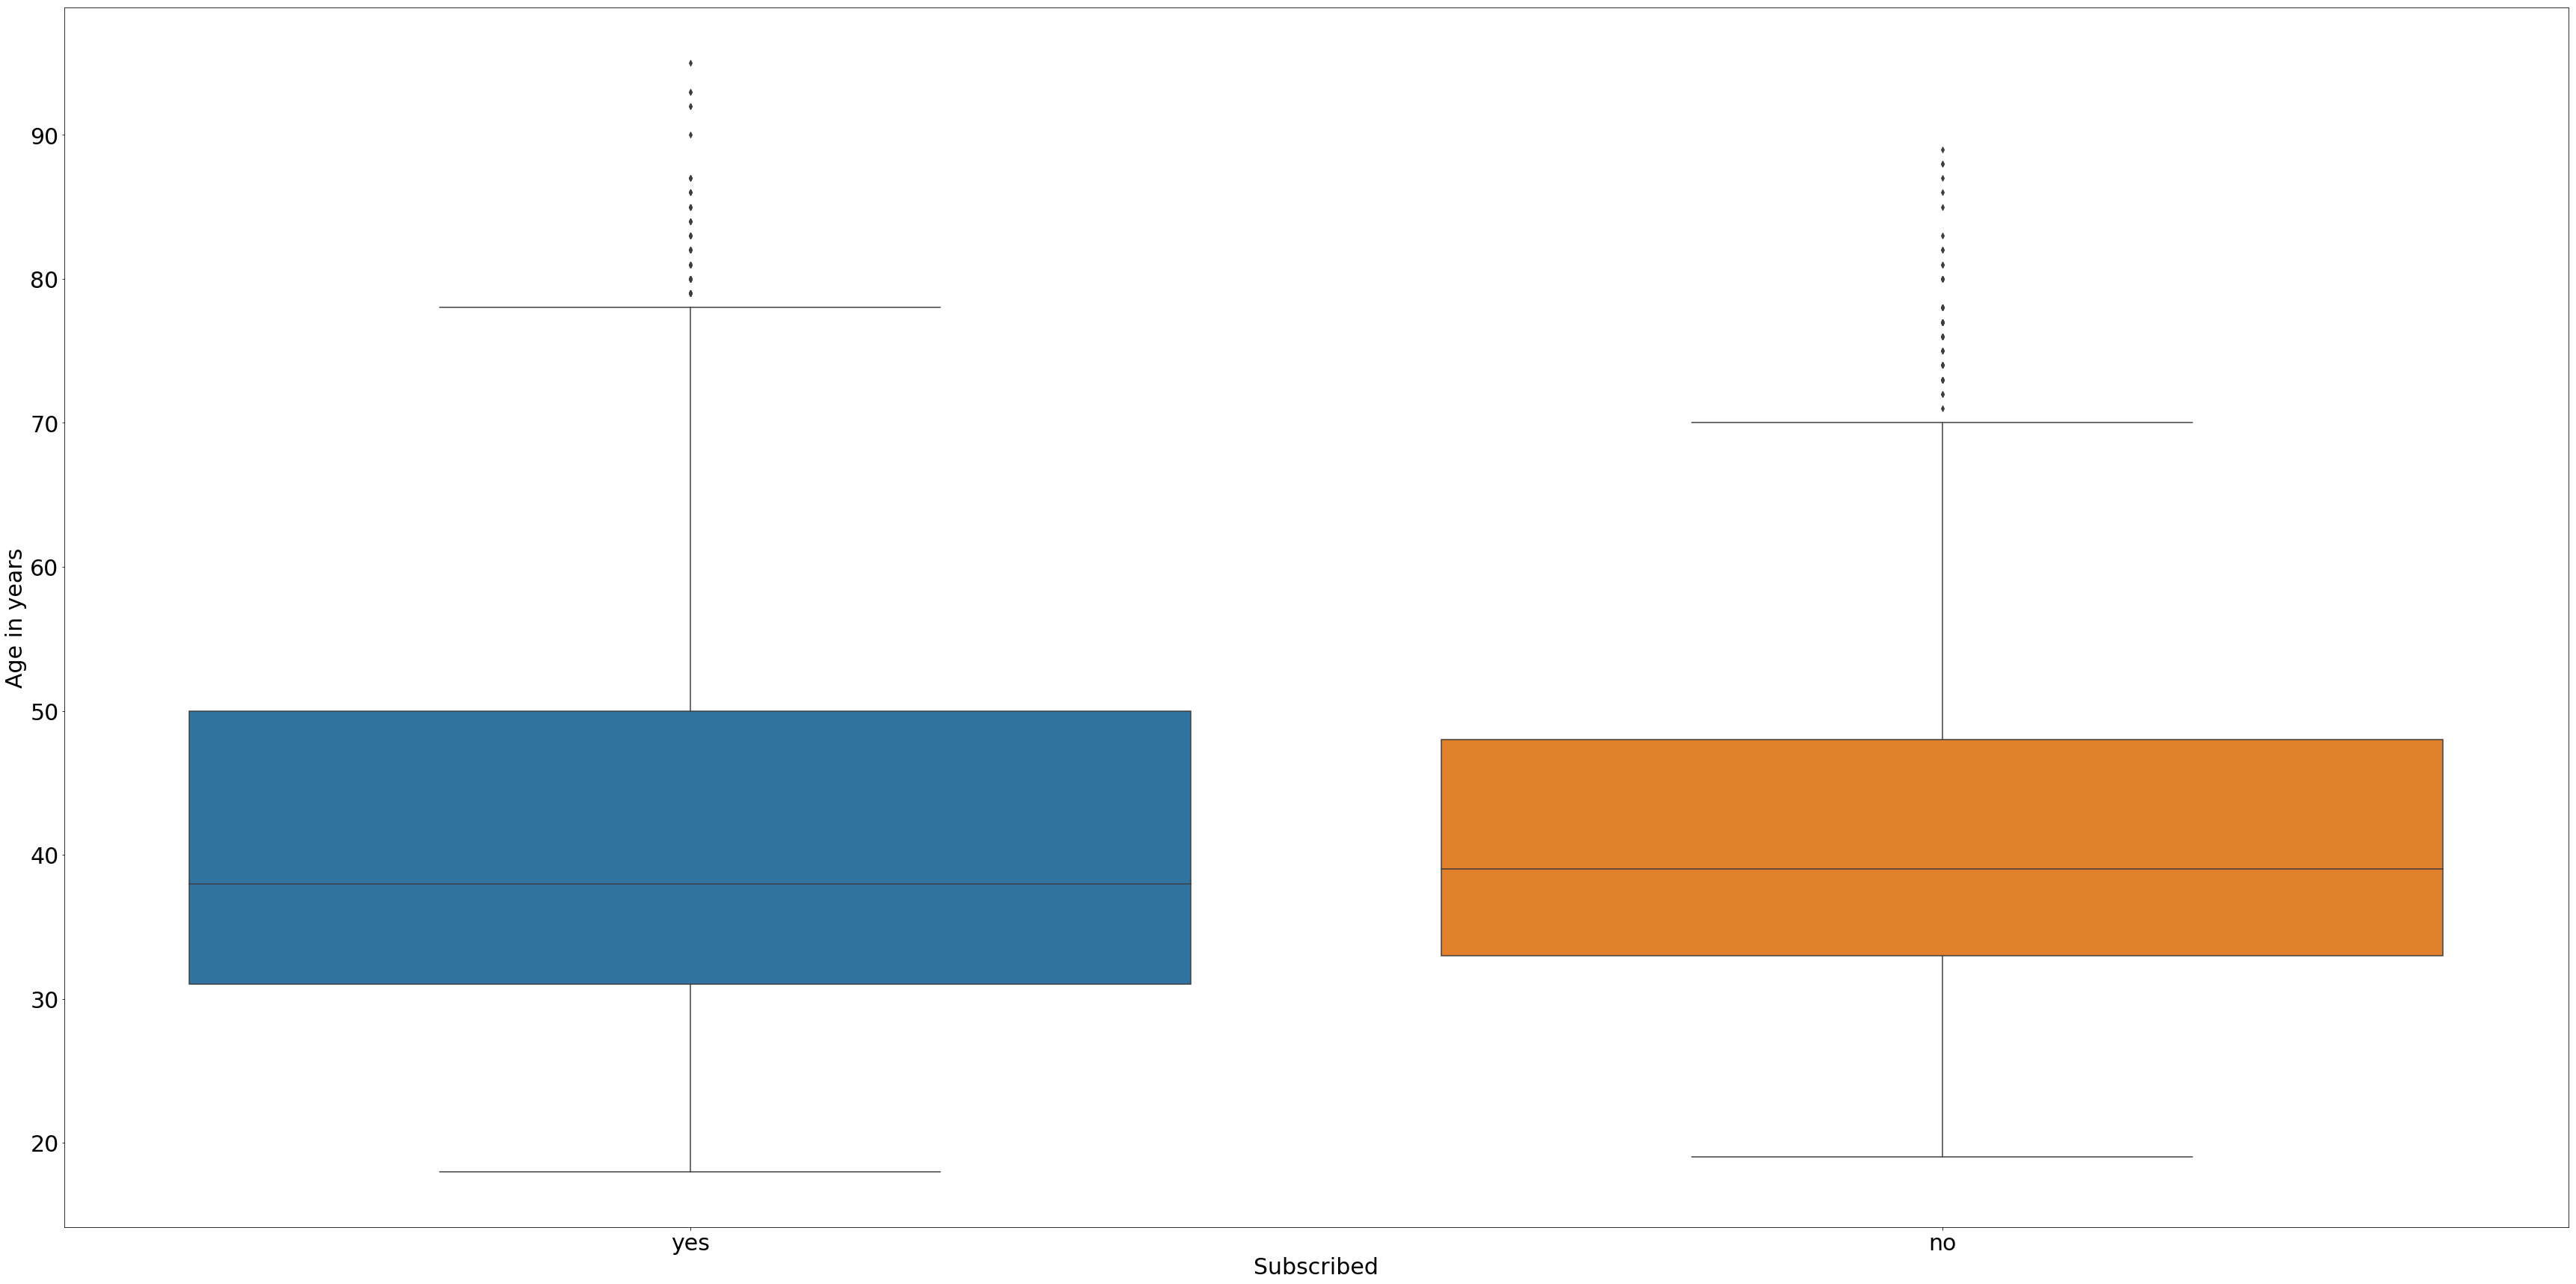

In [15]:
## Box plot with age and subscribed
## boxplot to see variation of ages
ax3 = sns.boxplot(y=dataset["age"], x=dataset["subscribed"])
ax3.figure.set_size_inches(60,30)
ax3.set_ylabel("Age in years", fontsize=30)
ax3.set_xlabel("Subscribed", fontsize=30)
ax3.tick_params(labelsize=30)

Can see that subscribers ages vary but the non-subscribers are packed between the ages of mid-30's to late 40's

In [16]:
# Create a temporary dataset called younger where only age < 60 included
# filter data 
younger = dataset[dataset.age < 60]

In [17]:
younger.head()

,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


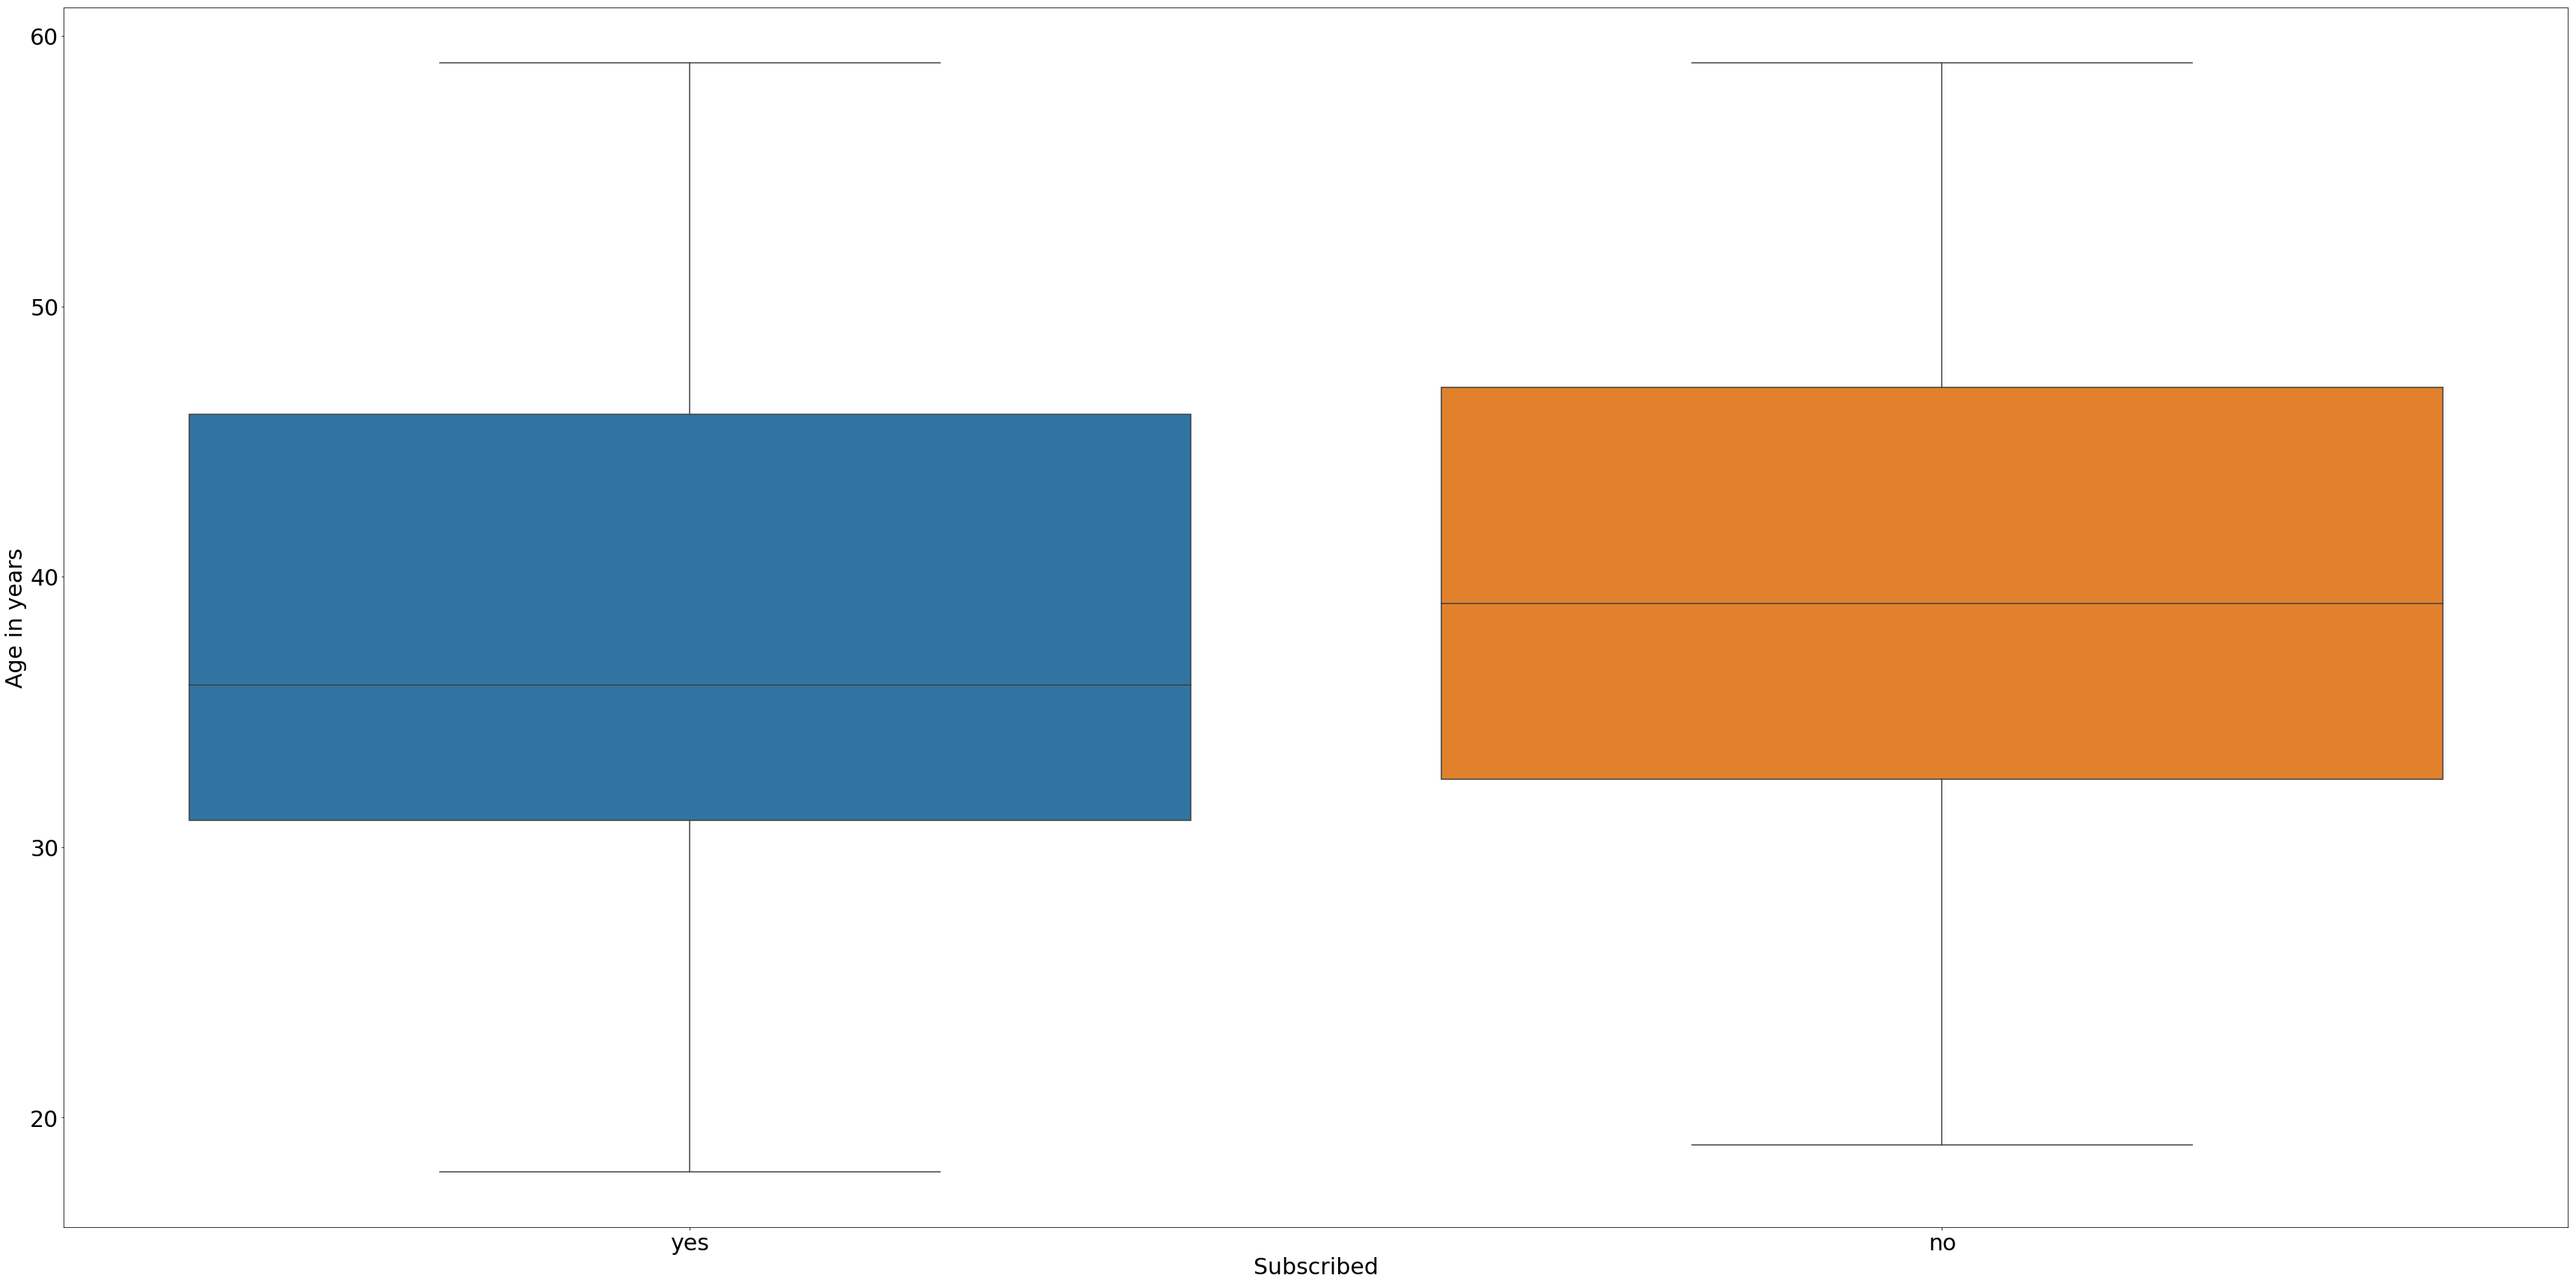

In [18]:
## Box plot with age and subscribed for younger dataset
## boxplot to see variation of ages
ax4 = sns.boxplot(y=younger["age"], x=younger["subscribed"])
ax4.figure.set_size_inches(60,30)
ax4.set_ylabel("Age in years", fontsize=30)
ax4.set_xlabel("Subscribed", fontsize=30)
ax4.tick_params(labelsize=30)

Variation in the dataset reduced between subscribers and non-subscribers. This has normalized the age. 
Not sure if it is a good idea to exclude as age may be a factor in subscribing

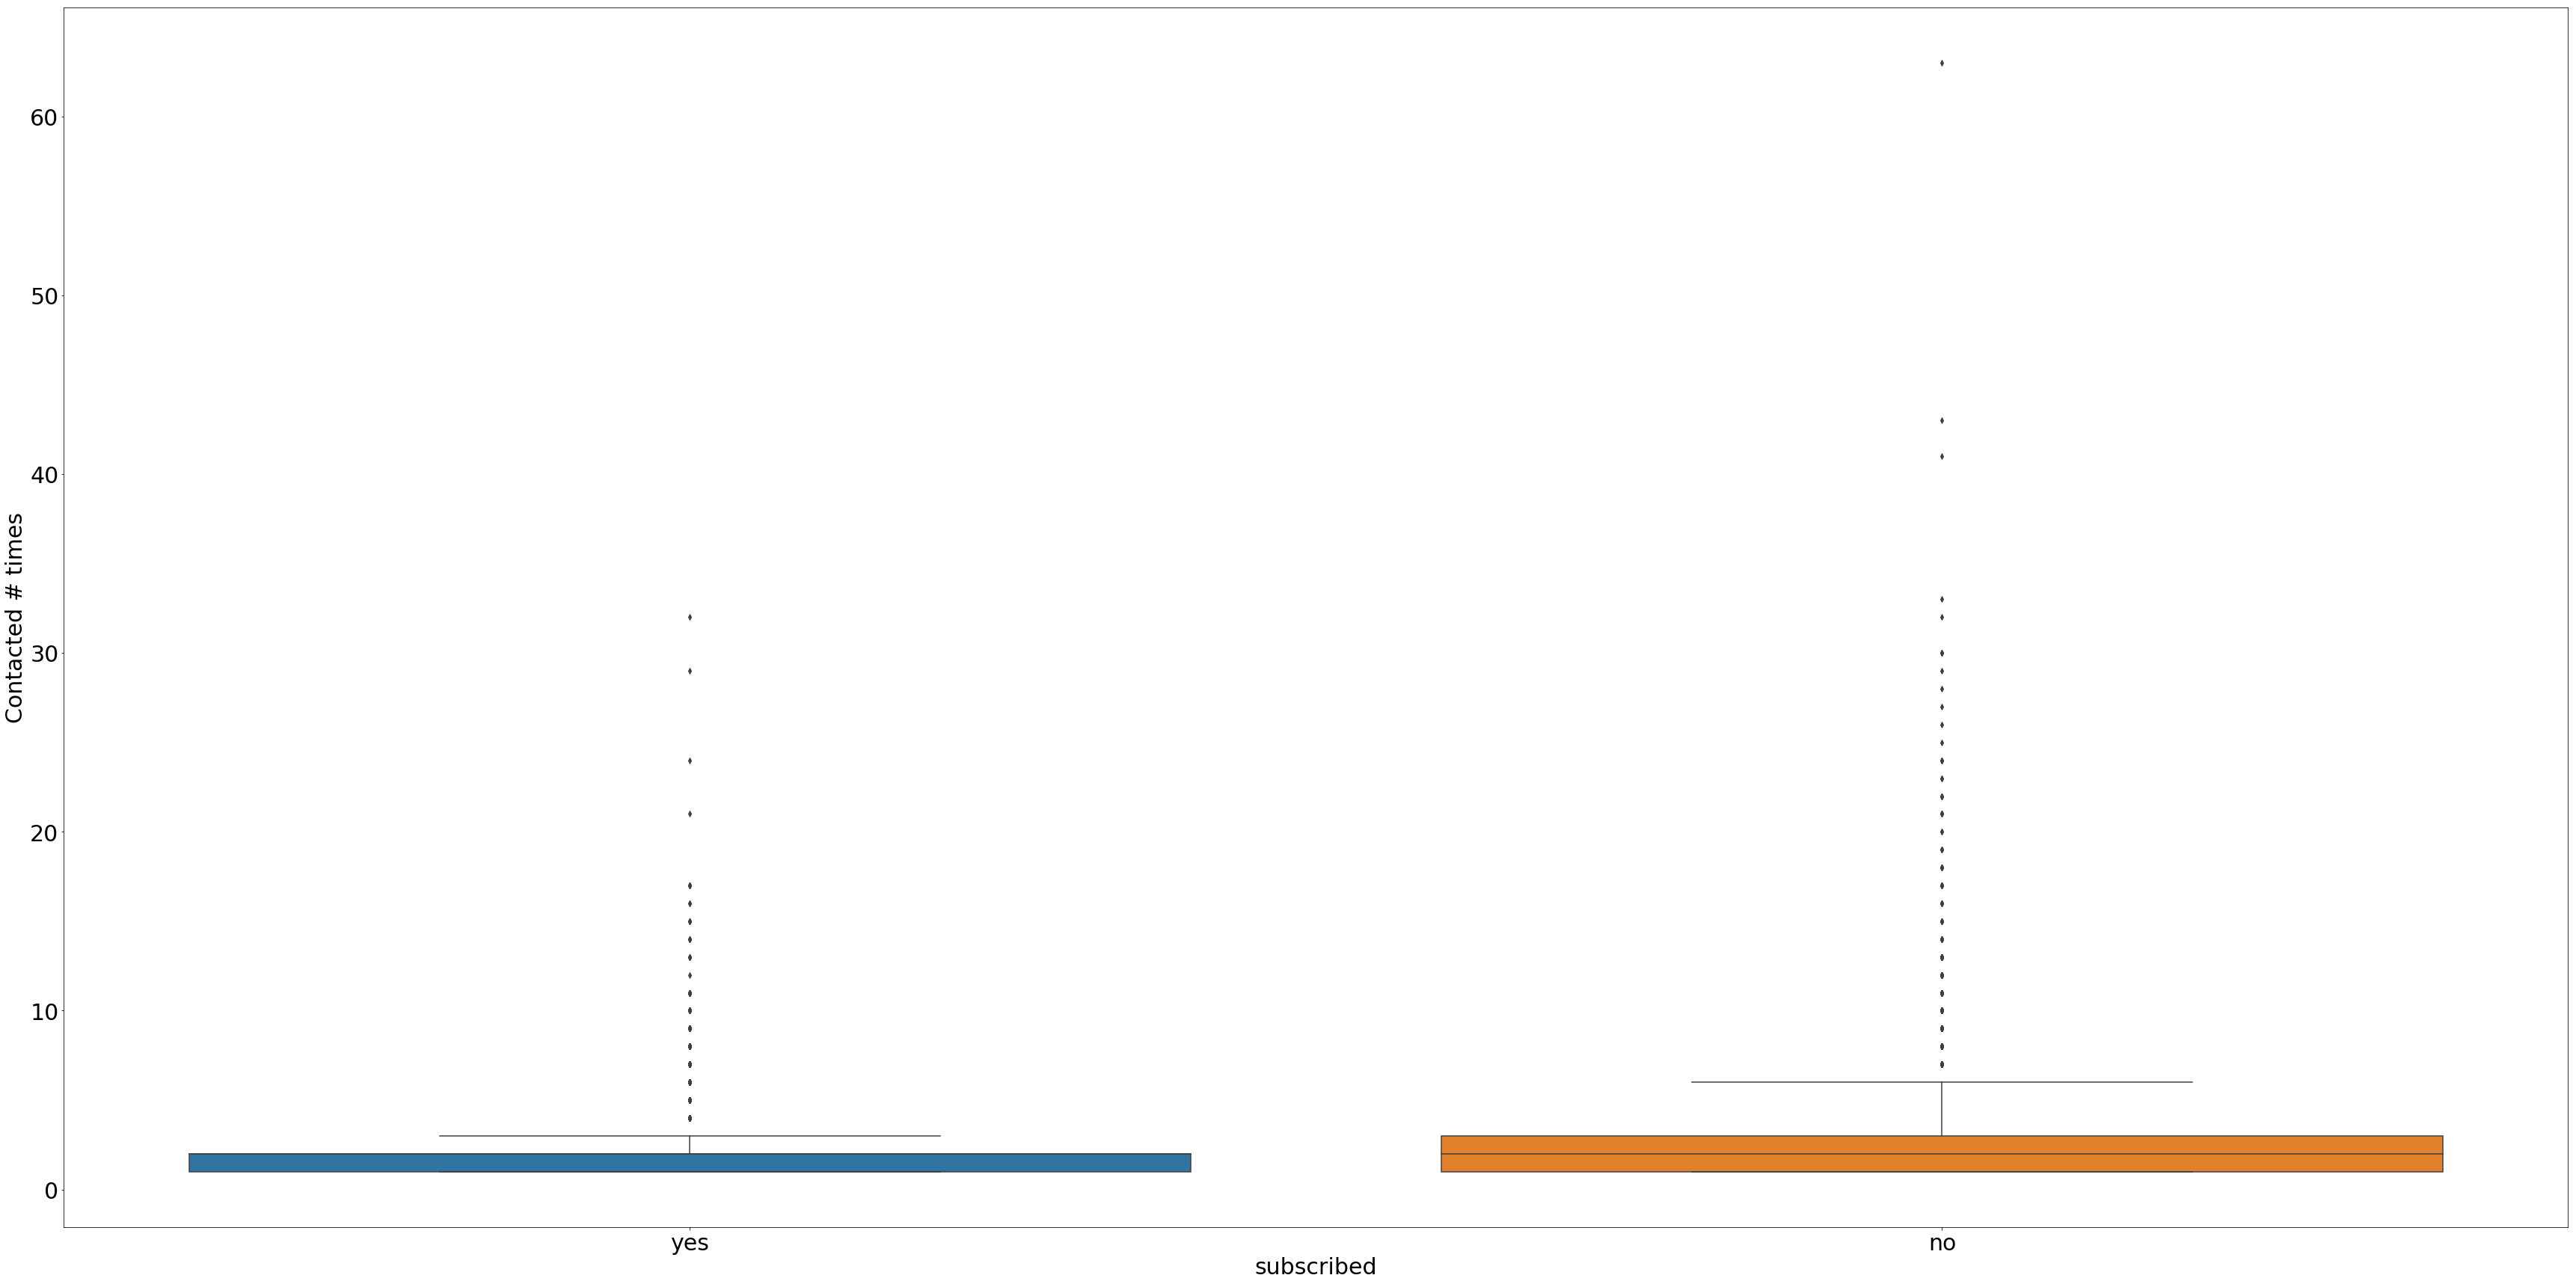

In [19]:
# relationship of number of calls with subscription outcome
## Box plot 
ax5 = sns.boxplot(x=dataset["subscribed"], y=dataset["numberTimesContactedInCampaign"])
ax5.figure.set_size_inches(60,30)
ax5.set_ylabel("Contacted # times", fontsize=30)
ax5.set_xlabel("subscribed", fontsize=30)
ax5.tick_params(labelsize=30)

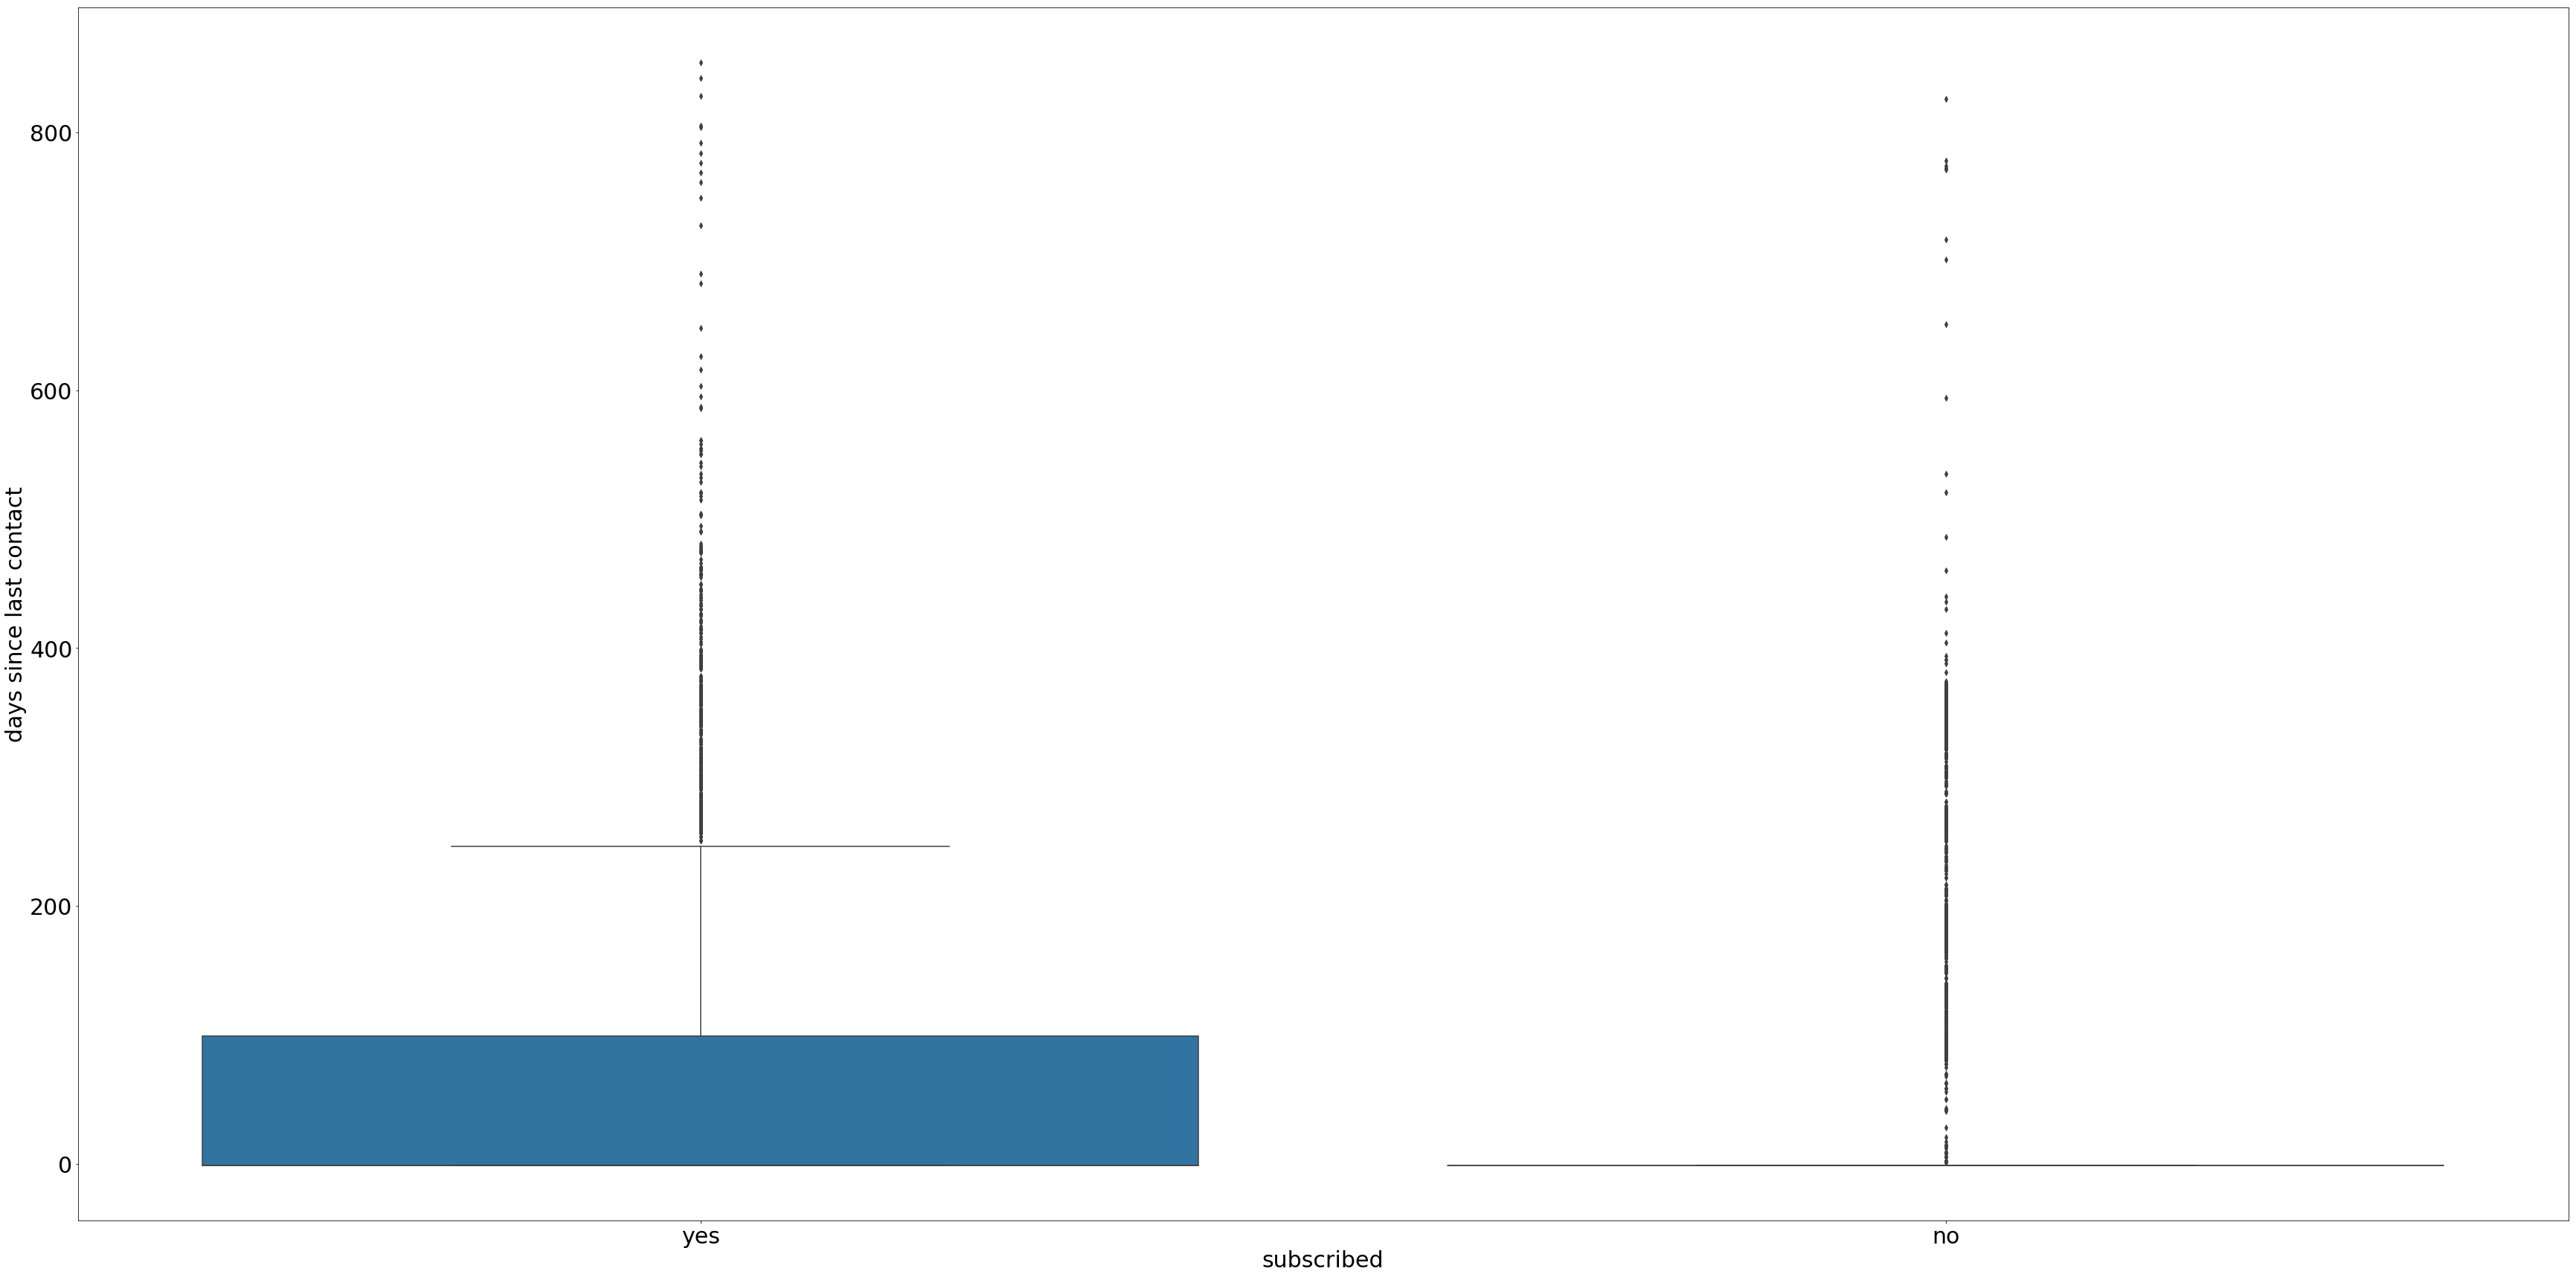

In [20]:
##daysSinceLastContact              
##totalTimesContacted         

# relationship of number of calls with subscription outcome
## Box plot 
ax6 = sns.boxplot(x=dataset["subscribed"], y=dataset["daysSinceLastContact"])
ax6.figure.set_size_inches(60,30)
ax6.set_ylabel("days since last contact", fontsize=30)
ax6.set_xlabel("subscribed", fontsize=30)
ax6.tick_params(labelsize=30)

Seems that the more you contact people, the less they are likely to subscribe and same goes with recentcy, the more recent the contact has been, the less people are likely to subscribe

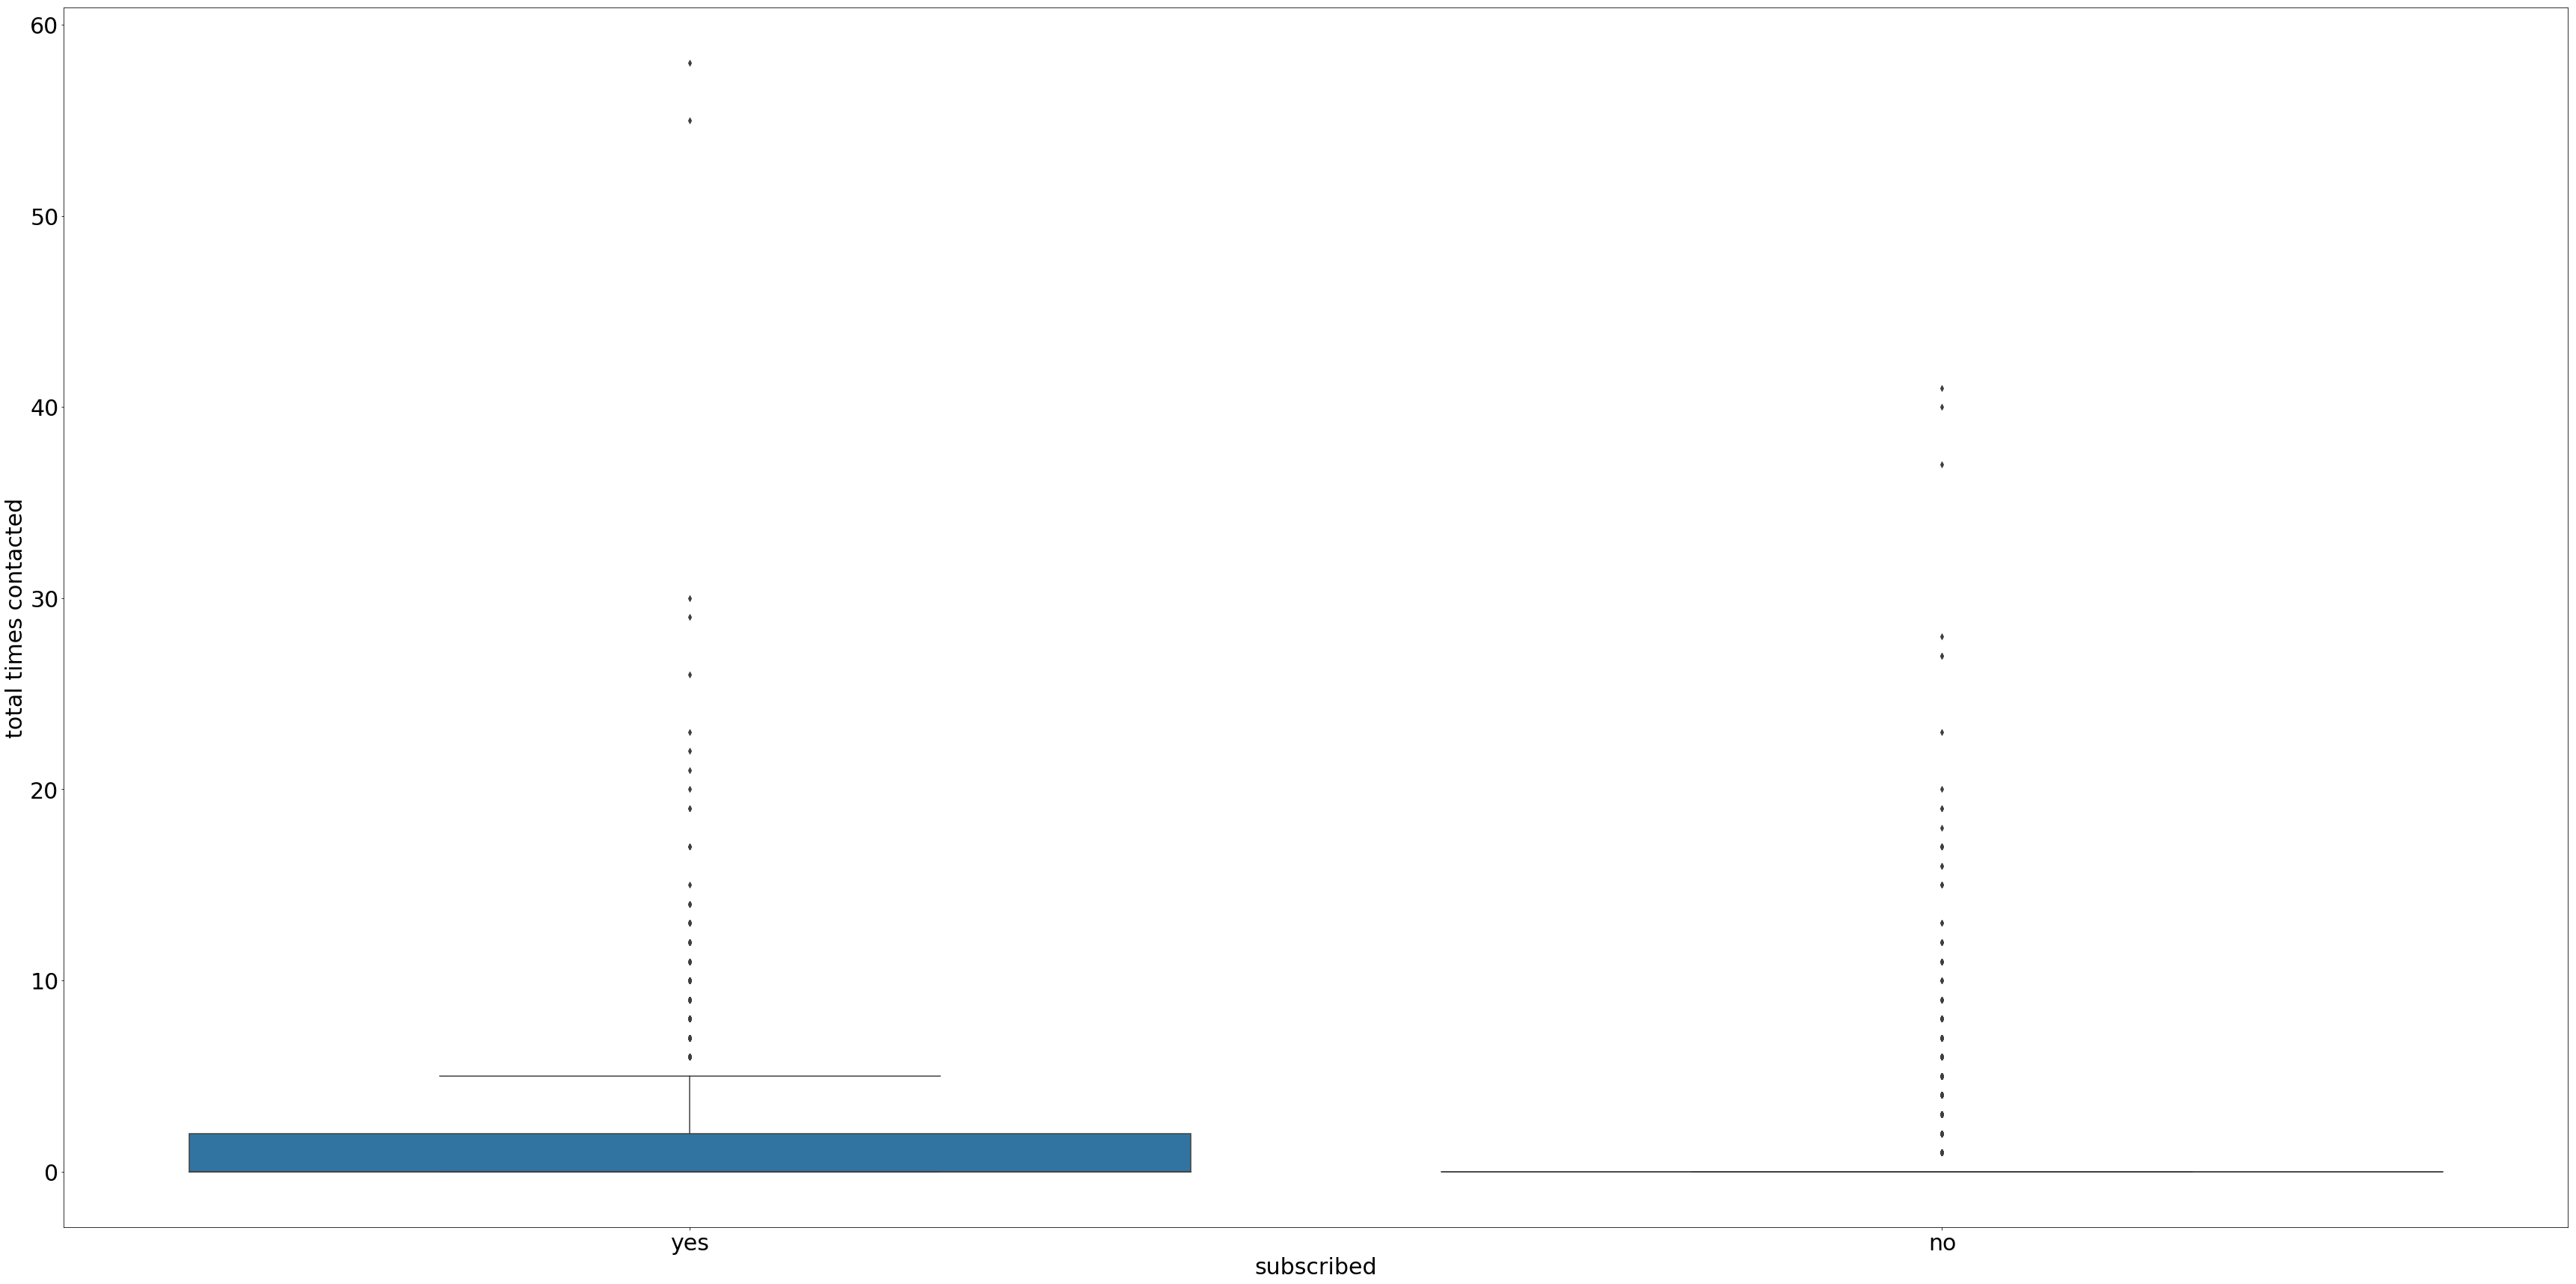

In [21]:
##totalTimesContacted         

# relationship of number of calls with subscription outcome
## Box plot 
ax7 = sns.boxplot(x=dataset["subscribed"], y=dataset["totalTimesContacted"])
ax7.figure.set_size_inches(60,30)
ax7.set_ylabel("total times contacted", fontsize=30)
ax7.set_xlabel("subscribed", fontsize=30)
ax7.tick_params(labelsize=30)

Total times contacted - if not a subscriber then this is zero which makes sense

The variable that look smost like to predict subscribers is total times contacted

### Bar plots

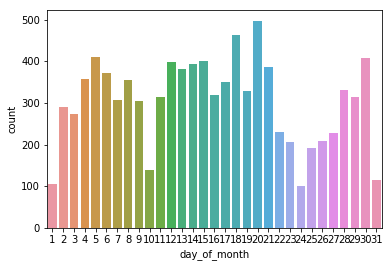

In [22]:
bar1 = sns.countplot(x="day_of_month", data=dataset)

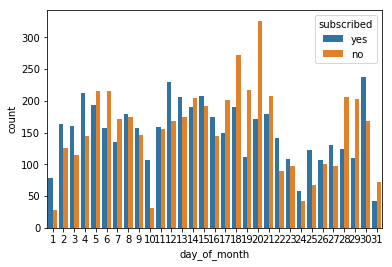

In [23]:
bar1 = sns.countplot(x="day_of_month", data=dataset, hue='subscribed')

Calls seem to drop slightly in the lat week of the month

In [24]:
#Lets verify this using valuecounts
dataset.day_of_month.value_counts()


20    497
18    463
5     410
30    407
15    400
12    398
14    394
21    387
13    381
6     372
4     357
8     354
17    351
28    330
19    329
16    320
11    315
29    313
7     307
9     304
2     289
3     274
22    231
27    228
26    208
23    206
25    191
10    138
31    115
1     106
24    100
Name: day_of_month, dtype: int64

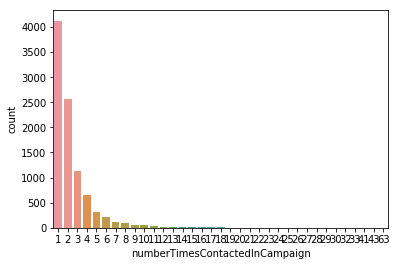

In [25]:
bar3 = sns.countplot(x="numberTimesContactedInCampaign", data=dataset)

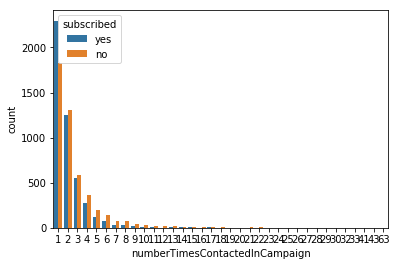

In [26]:
bar4 = sns.countplot(x="numberTimesContactedInCampaign", data=dataset, hue='subscribed')

 Seems some people got a large number of calls, upto 18 which appears to be very large

## Crosstab

In [27]:
# Looking at proportional frequencies
pd.crosstab(dataset['job'],dataset['subscribed'])

subscribed,no,yes
job,,
admin.,569,560
blue-collar,981,603
entrepreneur,170,97
housemaid,137,98
management,1024,1186
retired,222,473
self-employed,182,163
services,453,308
student,83,254


looks like students, retired or unemployed tend to subscribe more
whereas entrepreneur, housemaid, services or people in other jobs tend to be 50% y/n


In [28]:
# Looking at proportional frequencies
pd.crosstab(dataset['maritalStatus'],dataset['subscribed'])

subscribed,no,yes
maritalStatus,,
divorced,510,512
married,2902,2455
single,1363,1733


singles tend to subscribe, married tend to not subscribe as much and divorced are 50%


In [29]:
# Looking at proportional frequencies
pd.crosstab(dataset['education'],dataset['subscribed'])

subscribed,no,yes
education,,
primary,718,520
secondary,2459,2151
tertiary,1392,1787
unknown,206,242


tertiary tend to subscribe, primary and secondary are less likely to subscribe

In [30]:
# Looking at proportional frequencies
pd.crosstab(dataset['housingLoan'],dataset['subscribed'])

subscribed,no,yes
housingLoan,,
no,2083,3074
yes,2692,1626


People with housing loan tend to not subscribe vs. no housing loan tend to subscribe

##### what can we remove?
possibly the education level can be removed from the above as it is not showign a significant difference


### Graphical analysis of tabulated data

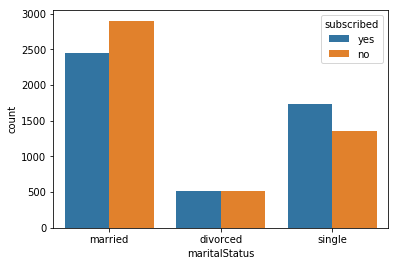

In [31]:
sns.countplot(x="maritalStatus", data=dataset, hue='subscribed')

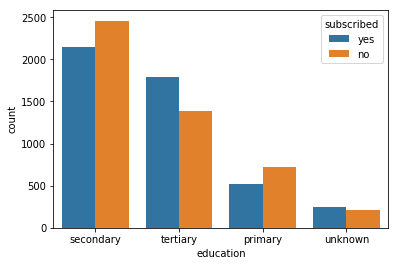

In [32]:
sns.countplot(x="education", data=dataset, hue='subscribed')

In [33]:
## matplotlib pyplot is used for data plots
import matplotlib.pyplot as plt

[None, None]

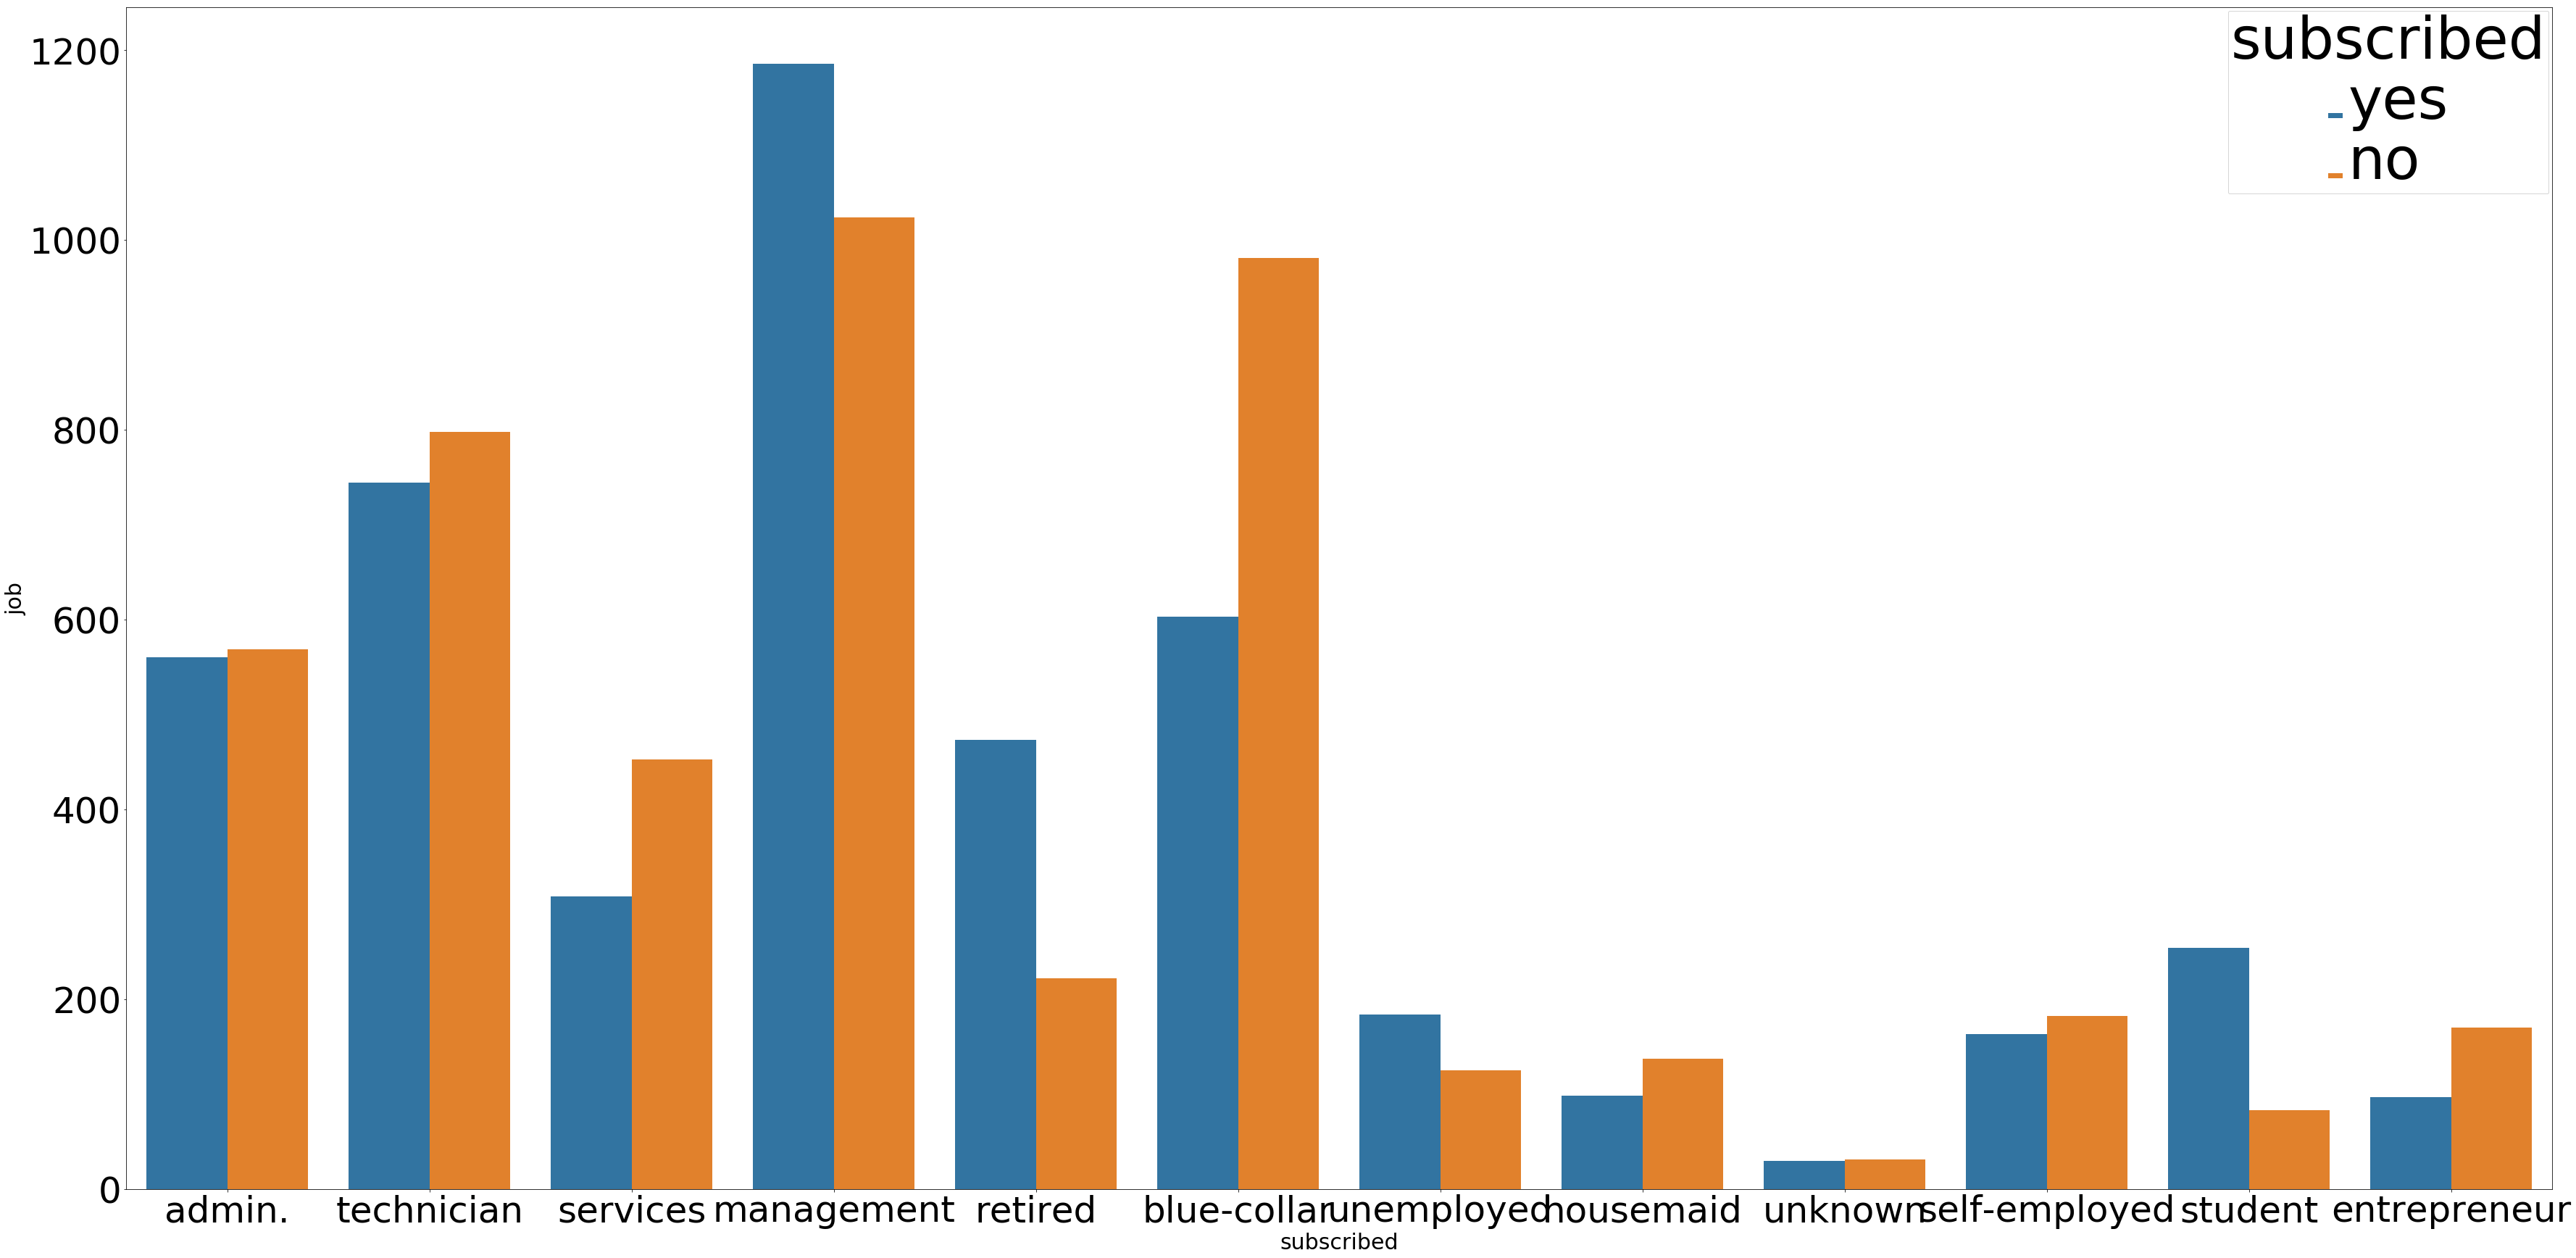

In [34]:
ax = sns.countplot(x="job", data=dataset, hue='subscribed')
ax.figure.set_size_inches(60,30)

ax.set_ylabel("job", fontsize=30)
ax.set_xlabel("subscribed", fontsize=30)
ax.tick_params(labelsize=50)

plt.setp(ax.get_legend().get_texts(), fontsize='80') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='80') # for legend title



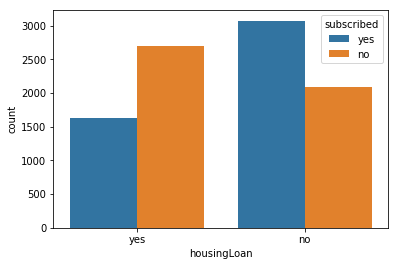

In [35]:
sns.countplot(x="housingLoan", data=dataset, hue='subscribed')

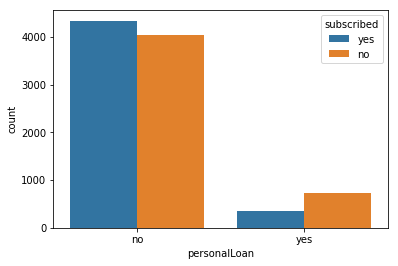

In [36]:
sns.countplot(x="personalLoan", data=dataset, hue='subscribed')

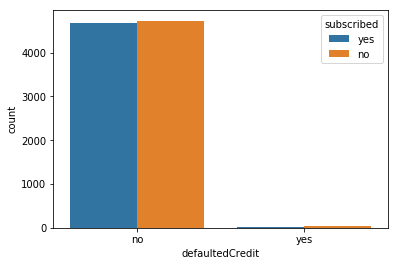

In [37]:
sns.countplot(x="defaultedCredit", data=dataset, hue='subscribed')

We can probably remove defaultedCredit

## Correlation

In [38]:
corr_data = pd.get_dummies(dataset)

In [39]:
corr_data.head()

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed_no,subscribed_yes
0,59,2343.0,5,1042,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,56,45.0,5,1467,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,41,1270.0,5,1389,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,55,2476.0,5,579,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,54,184.0,5,673,2,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [40]:
corr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 11159
Data columns (total 53 columns):
age                               9475 non-null int64
balance                           9475 non-null float64
day_of_month                      9475 non-null int64
callDuration                      9475 non-null int64
numberTimesContactedInCampaign    9475 non-null int64
daysSinceLastContact              9475 non-null int64
totalTimesContacted               9475 non-null int64
job_admin.                        9475 non-null uint8
job_blue-collar                   9475 non-null uint8
job_entrepreneur                  9475 non-null uint8
job_housemaid                     9475 non-null uint8
job_management                    9475 non-null uint8
job_retired                       9475 non-null uint8
job_self-employed                 9475 non-null uint8
job_services                      9475 non-null uint8
job_student                       9475 non-null uint8
job_technician            

In [41]:
corr_matrix=corr_data.corr()

In [42]:
corr_matrix

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed_no,subscribed_yes
age,1.000000,0.120153,-0.005764,-0.000602,0.009153,-0.001839,0.019463,-0.056782,-0.056703,0.022192,...,-0.117543,0.015472,0.061690,0.037255,-0.010632,-0.026816,0.058651,-0.019908,-0.032704,0.032704
balance,0.120153,1.000000,0.018799,0.022507,-0.005632,0.005932,0.020625,-0.041971,-0.041017,0.010524,...,-0.054380,0.076856,0.022384,0.014929,-0.004409,0.025538,0.029398,-0.029796,-0.063845,0.063845
day_of_month,-0.005764,0.018799,1.000000,-0.008201,0.122258,-0.066454,-0.055504,-0.011646,-0.016275,-0.011625,...,0.001725,0.067028,0.081455,-0.079072,-0.055576,-0.013180,-0.040488,0.074274,0.050770,-0.050770
callDuration,-0.000602,0.022507,-0.008201,1.000000,-0.030996,-0.035050,-0.028761,-0.028002,0.031970,-0.007237,...,0.017575,-0.007487,-0.019833,-0.007924,-0.041890,-0.009975,-0.028098,0.054325,-0.430231,0.430231
numberTimesContactedInCampaign,0.009153,-0.005632,0.122258,-0.030996,1.000000,-0.101746,-0.046383,-0.014612,0.012705,0.023964,...,-0.018202,-0.076390,-0.070907,-0.052728,-0.078315,-0.022309,-0.093224,0.131591,0.130536,-0.130536
daysSinceLastContact,-0.001839,0.005932,-0.066454,-0.035050,-0.101746,1.000000,0.498372,0.046123,-0.032882,-0.024633,...,0.017932,-0.014277,0.075389,0.109065,0.590020,0.332904,0.333269,-0.816396,-0.146884,0.146884
totalTimesContacted,0.019463,0.020625,-0.055504,-0.028761,-0.046383,0.498372,1.000000,0.022303,-0.039546,-0.017588,...,-0.023644,0.015005,0.052158,0.085061,0.322376,0.322574,0.321751,-0.612093,-0.136246,0.136246
job_admin.,-0.056782,-0.041971,-0.011646,-0.028002,-0.014612,0.046123,0.022303,1.000000,-0.164786,-0.062630,...,0.034144,-0.009631,0.008269,0.011699,0.032019,0.009744,0.006869,-0.032432,0.000021,-0.000021
job_blue-collar,-0.056703,-0.041017,-0.016275,0.031970,0.012705,-0.032882,-0.039546,-0.164786,1.000000,-0.076293,...,0.159567,-0.021389,-0.056835,-0.045524,-0.018191,0.002281,-0.079690,0.067156,0.103374,-0.103374
job_entrepreneur,0.022192,0.010524,-0.011625,-0.007237,0.023964,-0.024633,-0.017588,-0.062630,-0.076293,1.000000,...,-0.013429,0.055146,-0.017304,-0.008223,0.005562,-0.024449,-0.033715,0.031431,0.045210,-0.045210


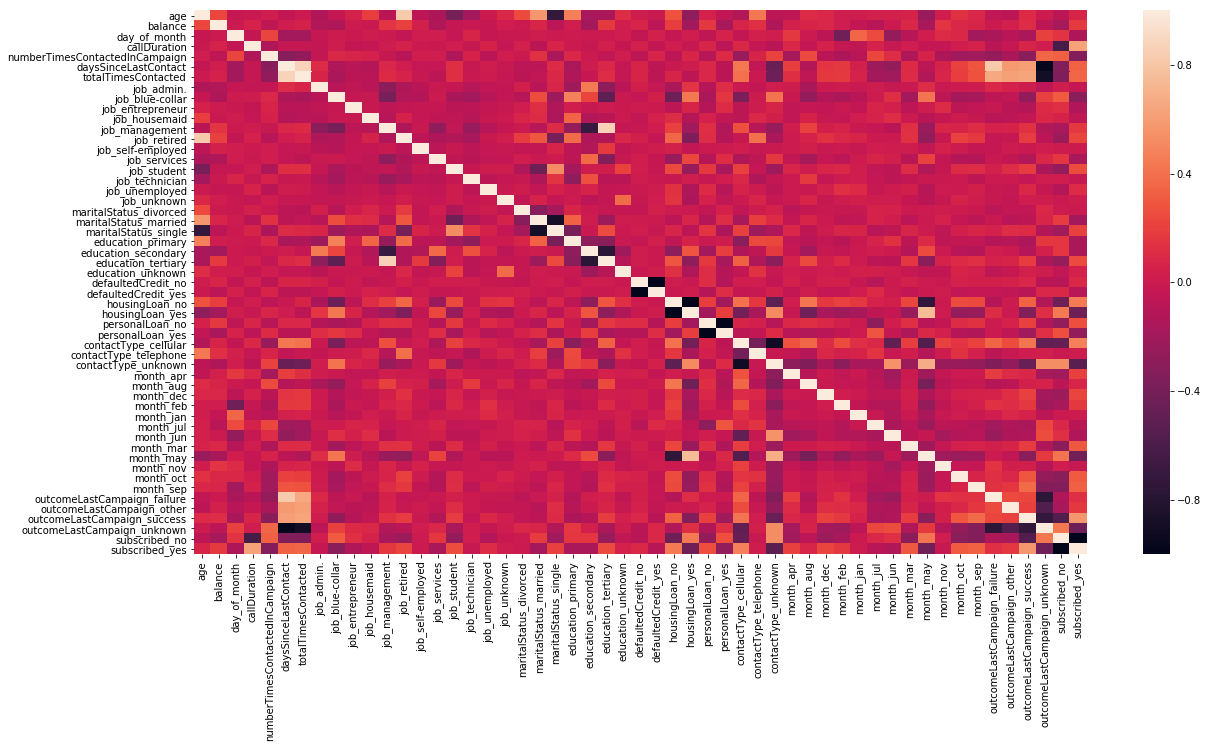

In [43]:
## Using using seaborn - annot=true option
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix.corr())

In [44]:
# Use the corr() method below to statistically analyse how well a linear relationship suits the data above
# We will create this using the corr() mehtod in pandas for pearson, kendall and spearman methods

corr_data.corr(method ='pearson') 

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed_no,subscribed_yes
age,1.000000,0.120153,-0.005764,-0.000602,0.009153,-0.001839,0.019463,-0.056782,-0.056703,0.022192,...,-0.117543,0.015472,0.061690,0.037255,-0.010632,-0.026816,0.058651,-0.019908,-0.032704,0.032704
balance,0.120153,1.000000,0.018799,0.022507,-0.005632,0.005932,0.020625,-0.041971,-0.041017,0.010524,...,-0.054380,0.076856,0.022384,0.014929,-0.004409,0.025538,0.029398,-0.029796,-0.063845,0.063845
day_of_month,-0.005764,0.018799,1.000000,-0.008201,0.122258,-0.066454,-0.055504,-0.011646,-0.016275,-0.011625,...,0.001725,0.067028,0.081455,-0.079072,-0.055576,-0.013180,-0.040488,0.074274,0.050770,-0.050770
callDuration,-0.000602,0.022507,-0.008201,1.000000,-0.030996,-0.035050,-0.028761,-0.028002,0.031970,-0.007237,...,0.017575,-0.007487,-0.019833,-0.007924,-0.041890,-0.009975,-0.028098,0.054325,-0.430231,0.430231
numberTimesContactedInCampaign,0.009153,-0.005632,0.122258,-0.030996,1.000000,-0.101746,-0.046383,-0.014612,0.012705,0.023964,...,-0.018202,-0.076390,-0.070907,-0.052728,-0.078315,-0.022309,-0.093224,0.131591,0.130536,-0.130536
daysSinceLastContact,-0.001839,0.005932,-0.066454,-0.035050,-0.101746,1.000000,0.498372,0.046123,-0.032882,-0.024633,...,0.017932,-0.014277,0.075389,0.109065,0.590020,0.332904,0.333269,-0.816396,-0.146884,0.146884
totalTimesContacted,0.019463,0.020625,-0.055504,-0.028761,-0.046383,0.498372,1.000000,0.022303,-0.039546,-0.017588,...,-0.023644,0.015005,0.052158,0.085061,0.322376,0.322574,0.321751,-0.612093,-0.136246,0.136246
job_admin.,-0.056782,-0.041971,-0.011646,-0.028002,-0.014612,0.046123,0.022303,1.000000,-0.164786,-0.062630,...,0.034144,-0.009631,0.008269,0.011699,0.032019,0.009744,0.006869,-0.032432,0.000021,-0.000021
job_blue-collar,-0.056703,-0.041017,-0.016275,0.031970,0.012705,-0.032882,-0.039546,-0.164786,1.000000,-0.076293,...,0.159567,-0.021389,-0.056835,-0.045524,-0.018191,0.002281,-0.079690,0.067156,0.103374,-0.103374
job_entrepreneur,0.022192,0.010524,-0.011625,-0.007237,0.023964,-0.024633,-0.017588,-0.062630,-0.076293,1.000000,...,-0.013429,0.055146,-0.017304,-0.008223,0.005562,-0.024449,-0.033715,0.031431,0.045210,-0.045210


Calculate the p-value and r coefficient for the "dummy" dataset (corr_data).

Filter the pairwise-comparisons which have a r coefficient higher than 0.5 or lower than -0.5; check out what is the p-value for these comparisons; also ignore the comparisons within a single original variables (for example: personalLoan_no & personalLoan_yes), because by definition that correlation will be significant and more likely negative.


In [45]:
corr_type, corr_matrix, corr_ps = rp.corr_case(corr_data)

In [46]:
corr_ps.head(3)

,age,balance,day_of_month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,outcomeLastCampaign_failure,outcomeLastCampaign_other,outcomeLastCampaign_success,outcomeLastCampaign_unknown,subscribed_no,subscribed_yes
age,0.0000,0.0000,0.5748,0.9533,0.3730,0.8579,0.0582,0.0000,0.0000,0.0308,...,0.0000,0.1321,0.0000,0.0003,0.3008,0.0090,0.0000,0.0527,0.0015,0.0015
balance,0.0000,0.0000,0.0673,0.0285,0.5836,0.5637,0.0447,0.0000,0.0001,0.3057,...,0.0000,0.0000,0.0293,0.1462,0.6679,0.0129,0.0042,0.0037,0.0000,0.0000
day_of_month,0.5748,0.0673,0.0000,0.4247,0.0000,0.0000,0.0000,0.2570,0.1132,0.2579,...,0.8667,0.0000,0.0000,0.0000,0.0000,0.1996,0.0001,0.0000,0.0000,0.0000


In [47]:
corr_type.head(3)

,Pearson correlation test using list-wise deletion
0,Total observations used = 9475


In [48]:
corr_table = rp.corr_pair(corr_data)

In [49]:
corr_table.head(3)

,r value,p-value,N
age & balance,0.1202,0.0000,9475
age & day_of_month,-0.0058,0.5748,9475
age & callDuration,-0.0006,0.9533,9475


In [50]:
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, age & balance to subscribed_no & subscribed_yes
Data columns (total 3 columns):
r value    1378 non-null object
p-value    1378 non-null object
N          1378 non-null int64
dtypes: int64(1), object(2)
memory usage: 83.1+ KB


Need to convert objects to float

In [51]:
corr_table['r value'] = corr_table['r value'].astype(float)
corr_table['p-value'] = corr_table['p-value'].astype(float)

In [52]:
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, age & balance to subscribed_no & subscribed_yes
Data columns (total 3 columns):
r value    1378 non-null float64
p-value    1378 non-null float64
N          1378 non-null int64
dtypes: float64(2), int64(1)
memory usage: 83.1+ KB


In [53]:
# > 0.5 r-coefficient
corr_table[corr_table['r value'] > 0.5].sort_values(by=['r value'])

,r value,p-value,N
age & job_retired,0.5703,0.0,9475
daysSinceLastContact & outcomeLastCampaign_failure,0.5900,0.0,9475
job_management & education_tertiary,0.5965,0.0,9475


In [54]:
# > 0.5 r-coefficient
corr_table[corr_table['r value'] < -0.5].sort_values(by=['r value'])

,r value,p-value,N
defaultedCredit_no & defaultedCredit_yes,-1.0000,0.0,9475
housingLoan_no & housingLoan_yes,-1.0000,0.0,9475
personalLoan_no & personalLoan_yes,-1.0000,0.0,9475
subscribed_no & subscribed_yes,-1.0000,0.0,9475
contactType_cellular & contactType_unknown,-0.8169,0.0,9475
daysSinceLastContact & outcomeLastCampaign_unknown,-0.8164,0.0,9475
maritalStatus_married & maritalStatus_single,-0.7946,0.0,9475
education_secondary & education_tertiary,-0.6917,0.0,9475
totalTimesContacted & outcomeLastCampaign_unknown,-0.6121,0.0,9475
outcomeLastCampaign_failure & outcomeLastCampaign_unknown,-0.5889,0.0,9475


## Classification

###### Challenges:
We are going to implement the Random forest algorithm in sklearn. The first reason for this is that random forests work well when classifying binary data i.e two possible classes. In our dataset the classes are 'Yes' and 'No' for the subscribed data so it is indeed binary. The second reason is that we already implemented a decision tree during the workshop - by definition, a random forest is just a collection of decision trees, each trained on a random subsample of the dataset. Let's start by splitting the data!

In [55]:
## Import more libraries

from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Next, you need to split the dataset into a training and test dataset. To do that, we need to define the independent variables and the dependent variable. Once you have the dataset X and y you can use the train_test_split formula to split the data. 

In [56]:

X = corr_data[['age',
'balance',
'day_of_month',
'callDuration',
'numberTimesContactedInCampaign',
'daysSinceLastContact',
'totalTimesContacted',
'job_admin.',
'job_blue-collar',
'job_entrepreneur',
'job_housemaid',
'job_management',
'job_retired',
'job_self-employed',
'job_services',
'job_student',
'job_technician',
'job_unemployed',
'job_unknown',
'maritalStatus_divorced',
'maritalStatus_married',
'maritalStatus_single',
'education_primary',
'education_secondary',
'education_tertiary',
'education_unknown',
'defaultedCredit_no',
'defaultedCredit_yes',
'housingLoan_no',
'housingLoan_yes',
'personalLoan_no',
'personalLoan_yes',
'contactType_cellular',
'contactType_telephone',
'contactType_unknown',
'month_apr',
'month_aug',
'month_dec',
'month_feb',
'month_jan',
'month_jul',
'month_jun',
'month_mar',
'month_may',
'month_nov',
'month_oct',
'month_sep',
'outcomeLastCampaign_failure',
'outcomeLastCampaign_other',
'outcomeLastCampaign_success',
'outcomeLastCampaign_unknown']]
y = corr_data[['subscribed_yes']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [57]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7106, 51) (7106, 1) (2369, 51) (2369, 1)


### Training the model

Use the function RandomForestClassifier to create a classifier model, called clf. Inside the function specify the following arguments:
n_estimators = number of trees in the forest; set up to 500.
criterion = whether you want to use gini metrics or entropy to build the trees; in this case lets us 'entropy'
max_depth = the maximum depth of each tree; set up to 5
random_state = the seed used by the random number generator

In [58]:
clf = RandomForestClassifier(n_estimators=500, criterion = 'entropy', max_depth=5, random_state=123)

Look at more Random Forest documentation here.
To train your model use the function .fit(X_train, y_train). So now your model is trained. Congratulations! I know, pretty unimpressive at this point. We run the model over our test data and see how accurate it is. Let's do that now.